# Generate figures for chapter

This file generates and saves the figures and tables in "Measuring Partisan Fairness" for _Political Geometry_. 

In [27]:
%run utilities
%run noninteractive_utilities  # Includes all the functions defined in the interactive notebooks

dpi = 300
mpl.rcParams['figure.dpi']= dpi

want_statewide_vote_share = True  # Set to True if you want Statewide Republican vote share, False if you want average district Republican vote share

if want_statewide_vote_share:
    x_label = "Statewide Republican vote share"
else:
    x_label = "Average district Republican vote share"

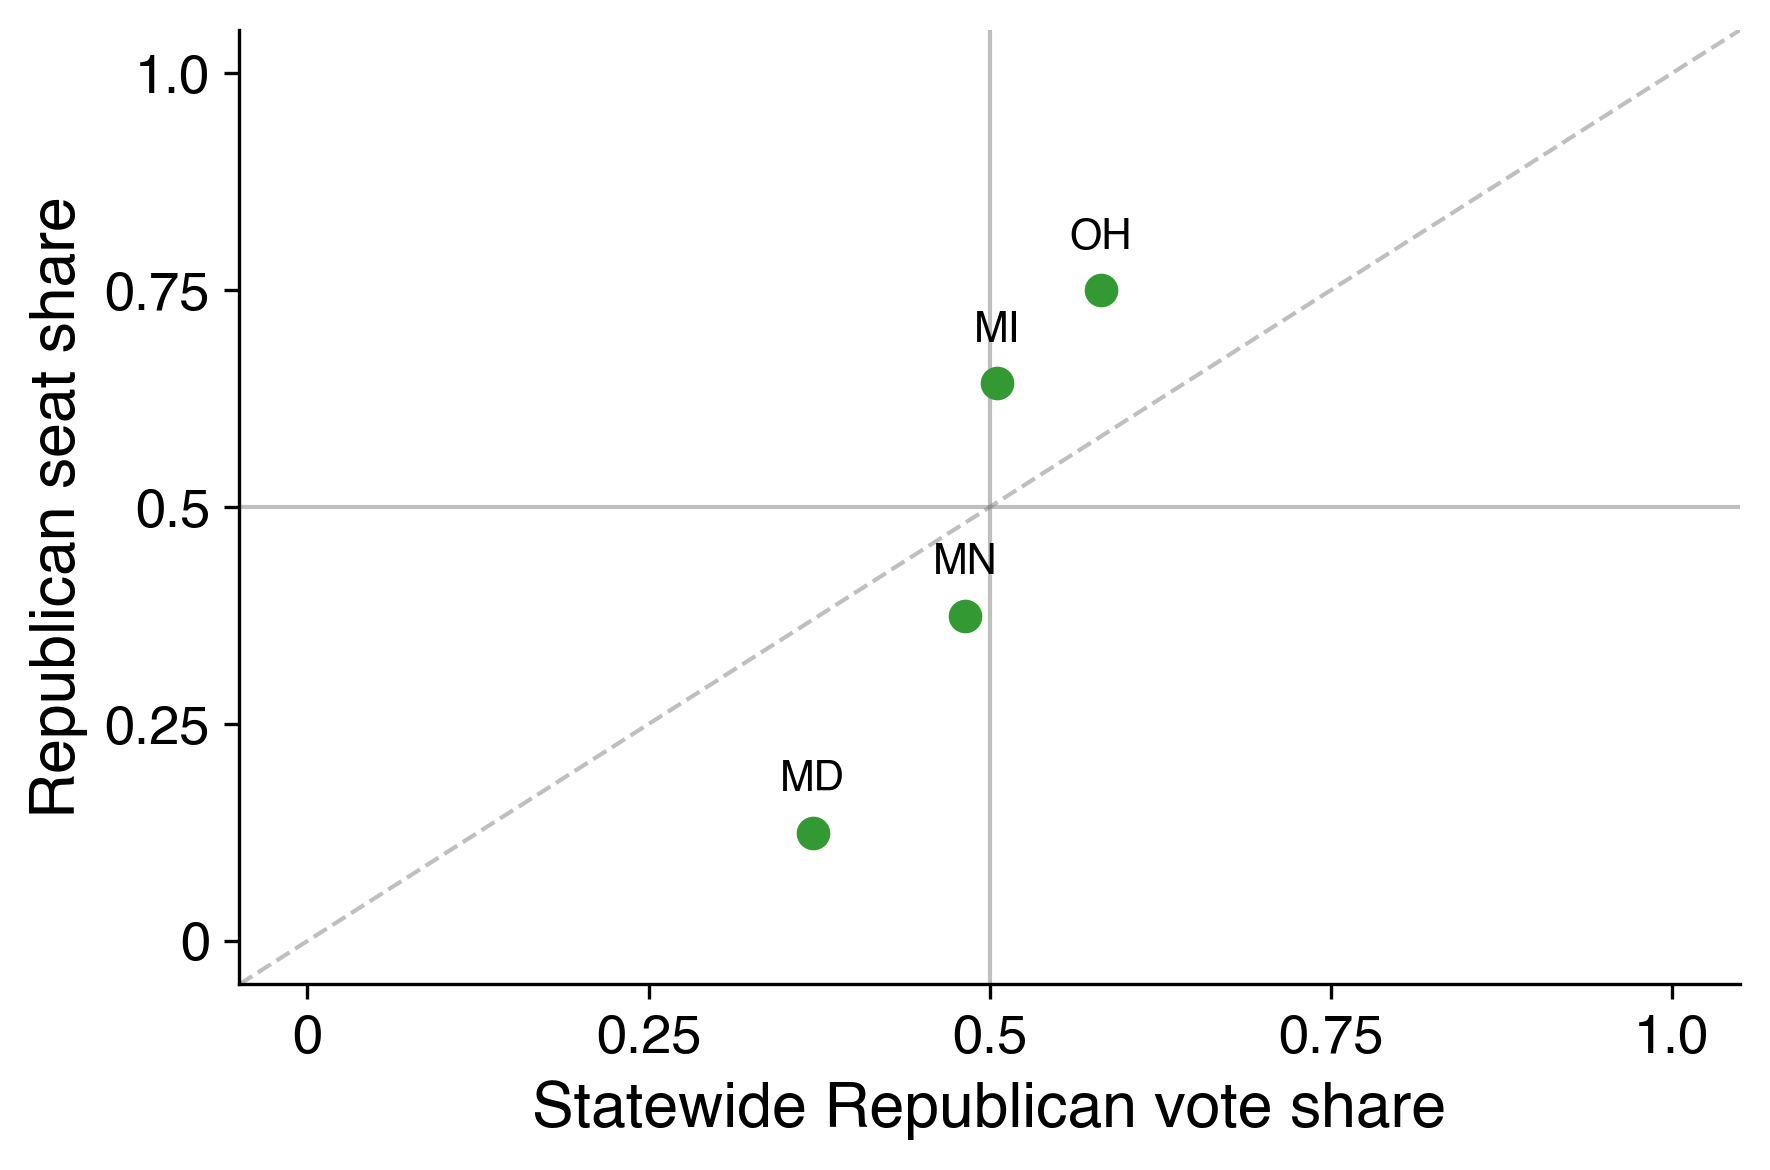

In [28]:
# Plot four elections on the seats-votes plane using MIT Elections Lab data

states = ["MD", "MN", "OH", "MI"]
year = 2016
average_district_vote_share_list = []
statewide_vote_share_list = []
seat_share_list = []
point_label_list = []

for state in states:
    republican_votes_by_district, democrat_votes_by_district = get_two_party_votes(state, year) 
    republican_vote_share_by_district, democrat_vote_share_by_district = votes_to_shares_by_district(republican_votes_by_district, democrat_votes_by_district)
    average_district_vote_share, seat_share = district_vote_shares_to_vote_and_seat_shares(republican_vote_share_by_district)
    republican_statewide_vote_share, *_ = votes_to_overall_vote_share(republican_votes_by_district, democrat_votes_by_district)

    average_district_vote_share_list.append(average_district_vote_share)
    statewide_vote_share_list.append(republican_statewide_vote_share)
    seat_share_list.append(seat_share)
    point_label_list.append(state)



if want_statewide_vote_share:
    plot_list_of_vote_and_seat_shares(statewide_vote_share_list, 
                                      seat_share_list, 
                                      regression=False, 
                                      text='', 
                                      point_labels=point_label_list,
                                      x_label=x_label)
else:
    plot_list_of_vote_and_seat_shares(average_district_vote_share_list, seat_share_list, regression=False, text='', point_labels=point_label_list)


plt.tight_layout()
plt.savefig("outputs/base_elections.png", dpi=500)


Slope of regression line: 2.6484227133944844
Intercept of regression line: -0.7475004367652791


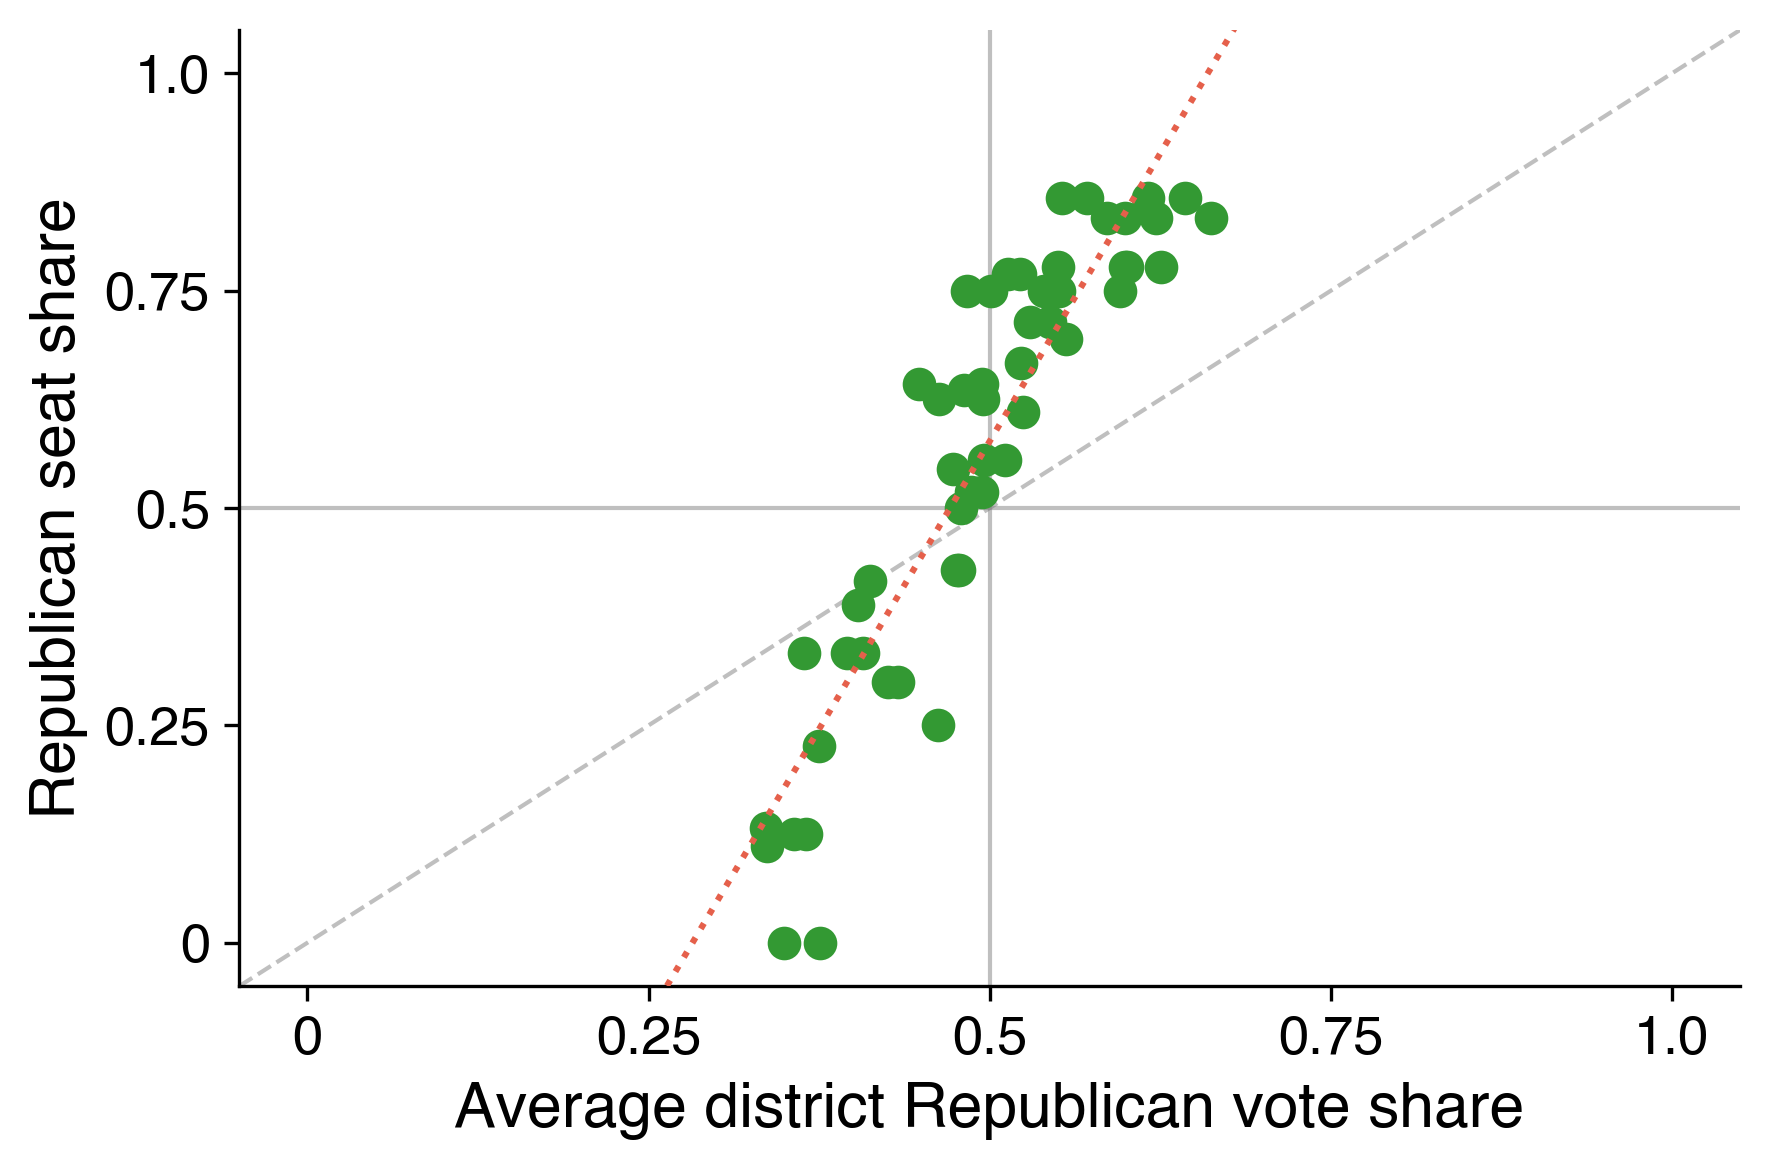

In [29]:
# Plot data from the Daily Kos breakdown of Presidential vote share by Congressional District

votes, seats = read_daily_kos_data()
plot_list_of_vote_and_seat_shares(votes, seats)
plt.tight_layout()
plt.savefig("outputs/daily_kos.png", dpi=500)


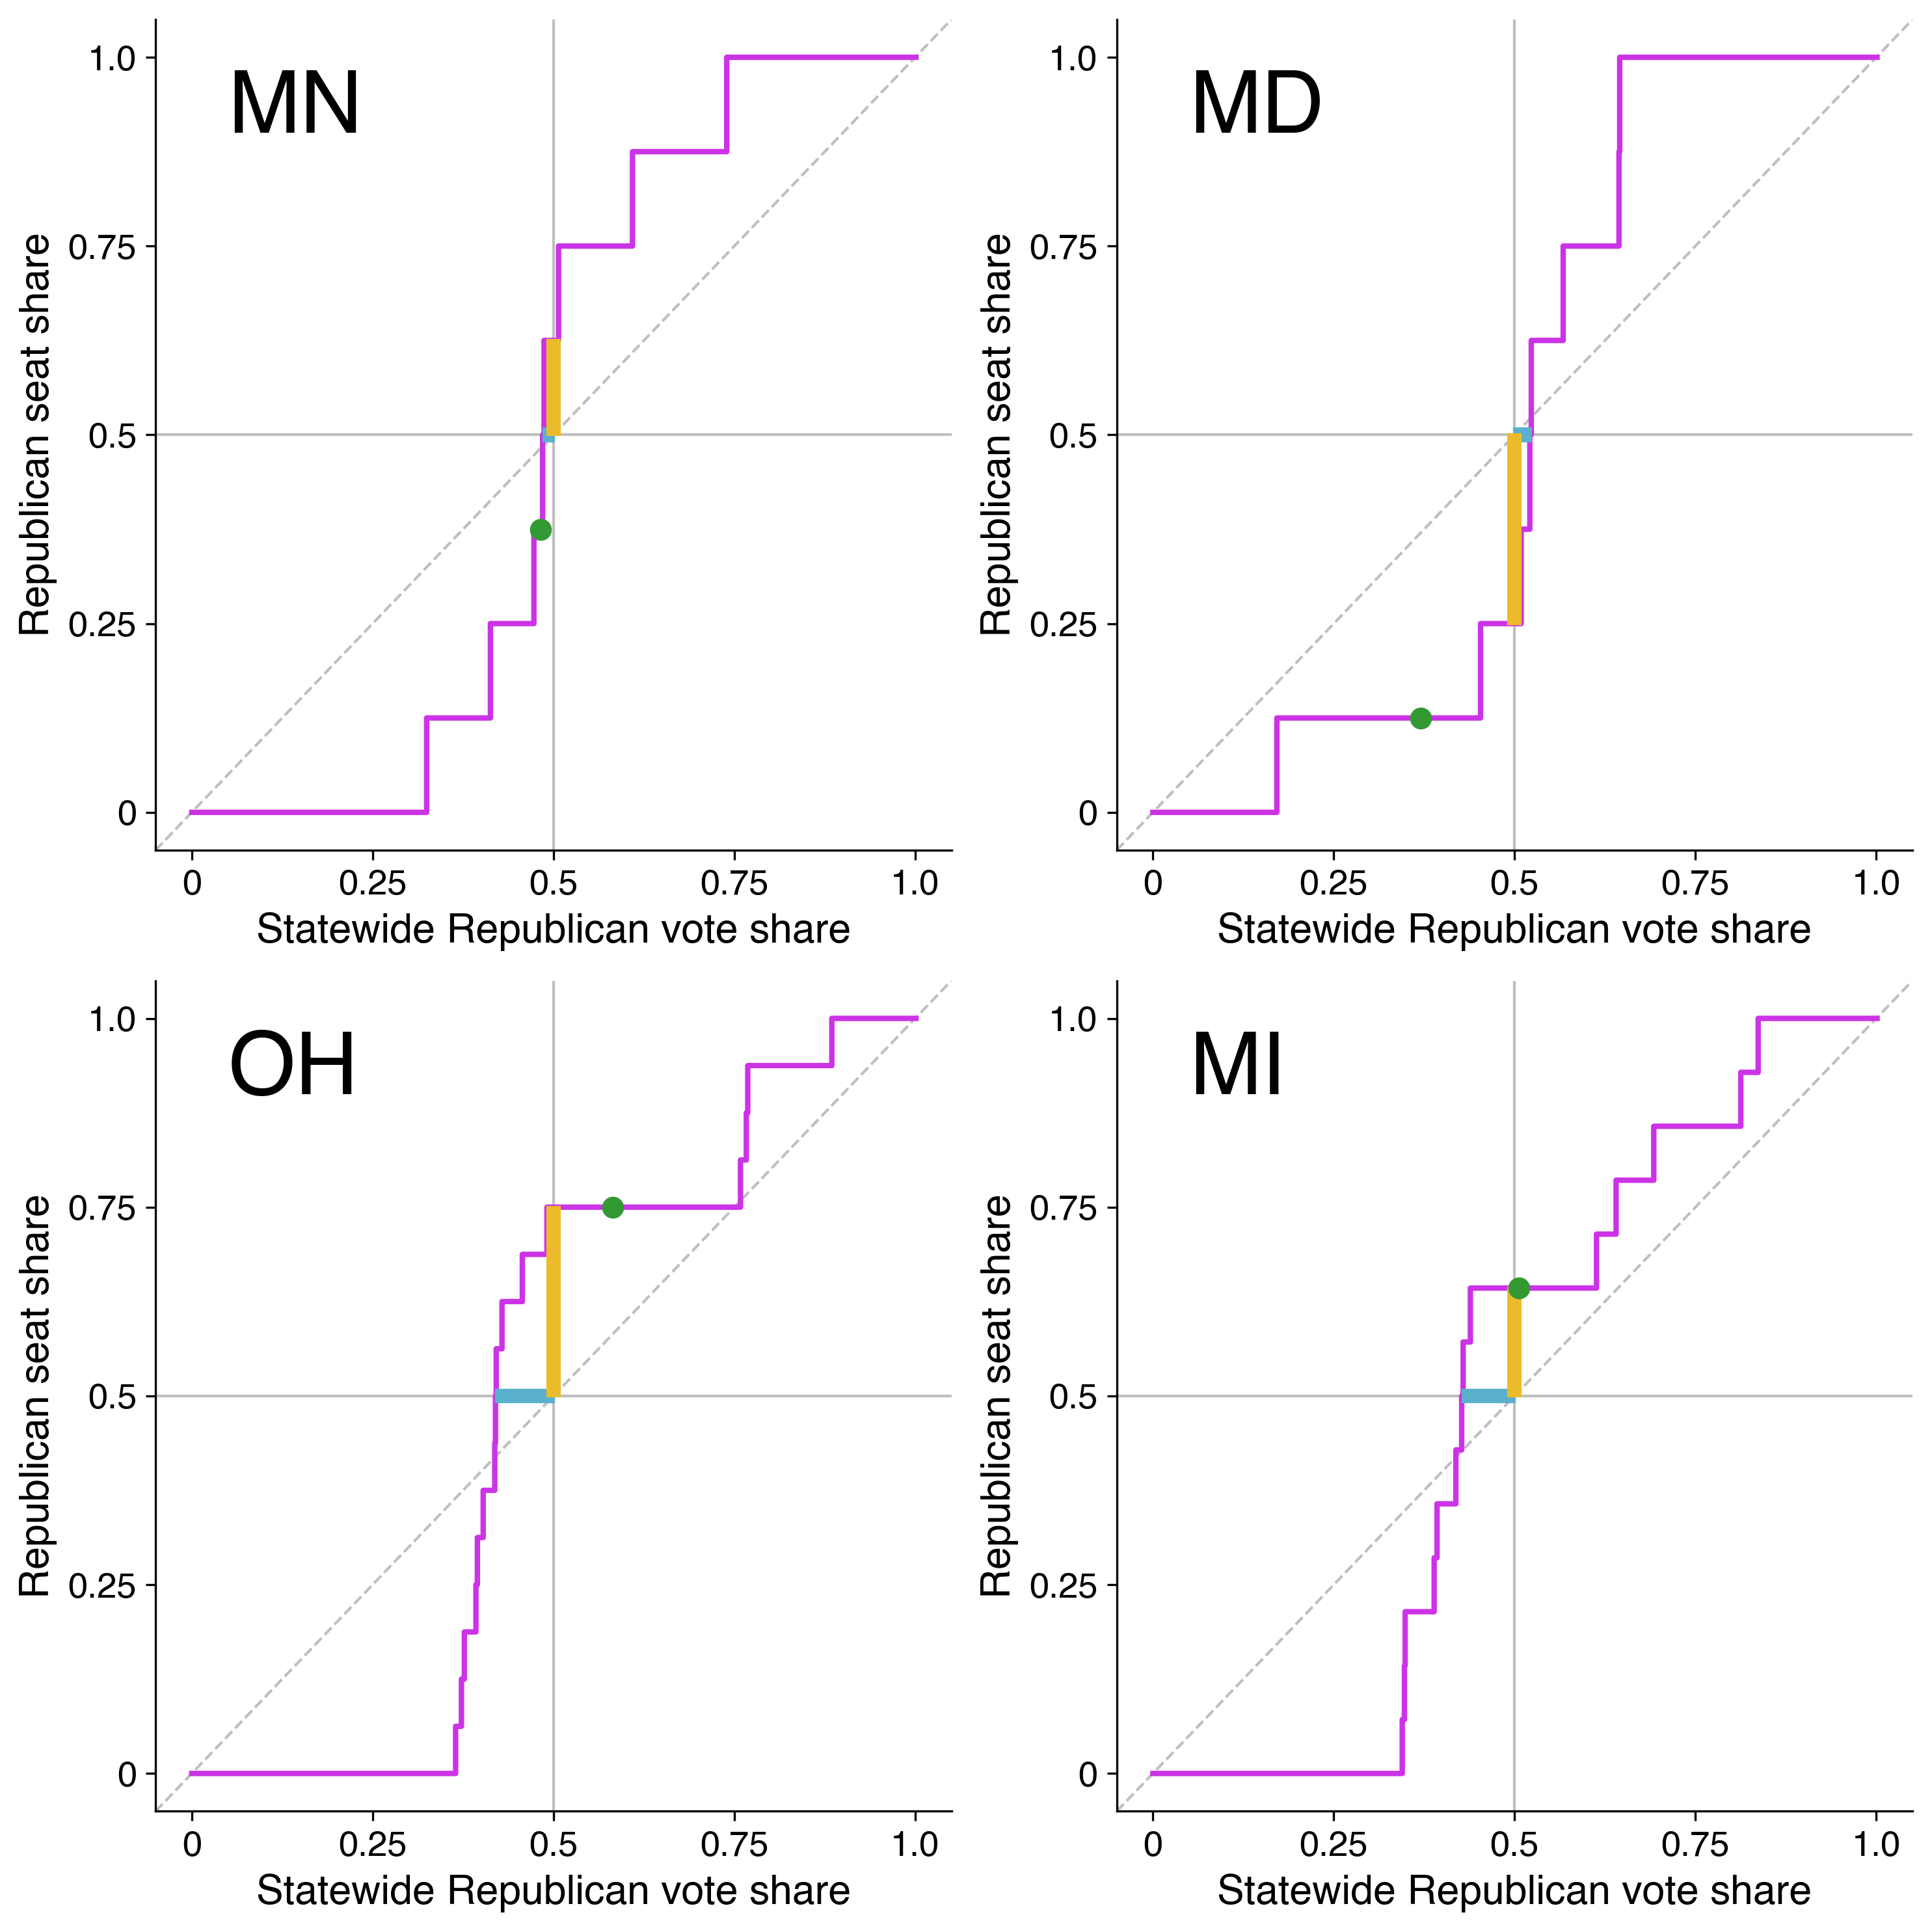

In [30]:
# Plot measures of partisan symmetry relating to the (0.5, 0.5) point

states = ["MN", "MD", "OH", "MI"]
year = 2016
actual_vote_share_list = []
actual_seat_share_list = []
vote_list = []
seat_list = []
district_vote_shares = []


for state in states:
    rep_votes_by_district, dem_votes_by_district = get_two_party_votes(state, year)
    rep_vote_shares_by_district, dem_vote_shares_by_district = votes_to_shares_by_district(rep_votes_by_district, dem_votes_by_district)
    average_district_vote_share, rep_seat_share = district_vote_shares_to_vote_and_seat_shares(rep_vote_shares_by_district)
    republican_statewide_vote_share, *_ = votes_to_overall_vote_share(rep_votes_by_district, dem_votes_by_district)   
    district_vote_shares.append(rep_vote_shares_by_district)
    
    if want_statewide_vote_share:
        actual_vote_share_list.append(republican_statewide_vote_share)
        actual_seat_share_list.append(rep_seat_share)
        ups_votes, ups_seats = ups_linear_using_statewide_vote_share(rep_votes_by_district, dem_votes_by_district)
    else:
        actual_vote_share_list.append(average_district_vote_share)
        actual_seat_share_list.append(rep_seat_share)
        ups_votes, ups_seats = ups_linear(rep_vote_shares_by_district)

    vote_list.append(ups_votes) 
    seat_list.append(ups_seats)


plot_mean_median_and_partisan_bias_grid(states,
                                        actual_vote_share_list, 
                                        actual_seat_share_list, 
                                        vote_list, 
                                        seat_list,
                                        x_label=x_label)

plt.tight_layout()
plt.savefig("outputs/mean_median_partisan_bias.png", dpi=500)


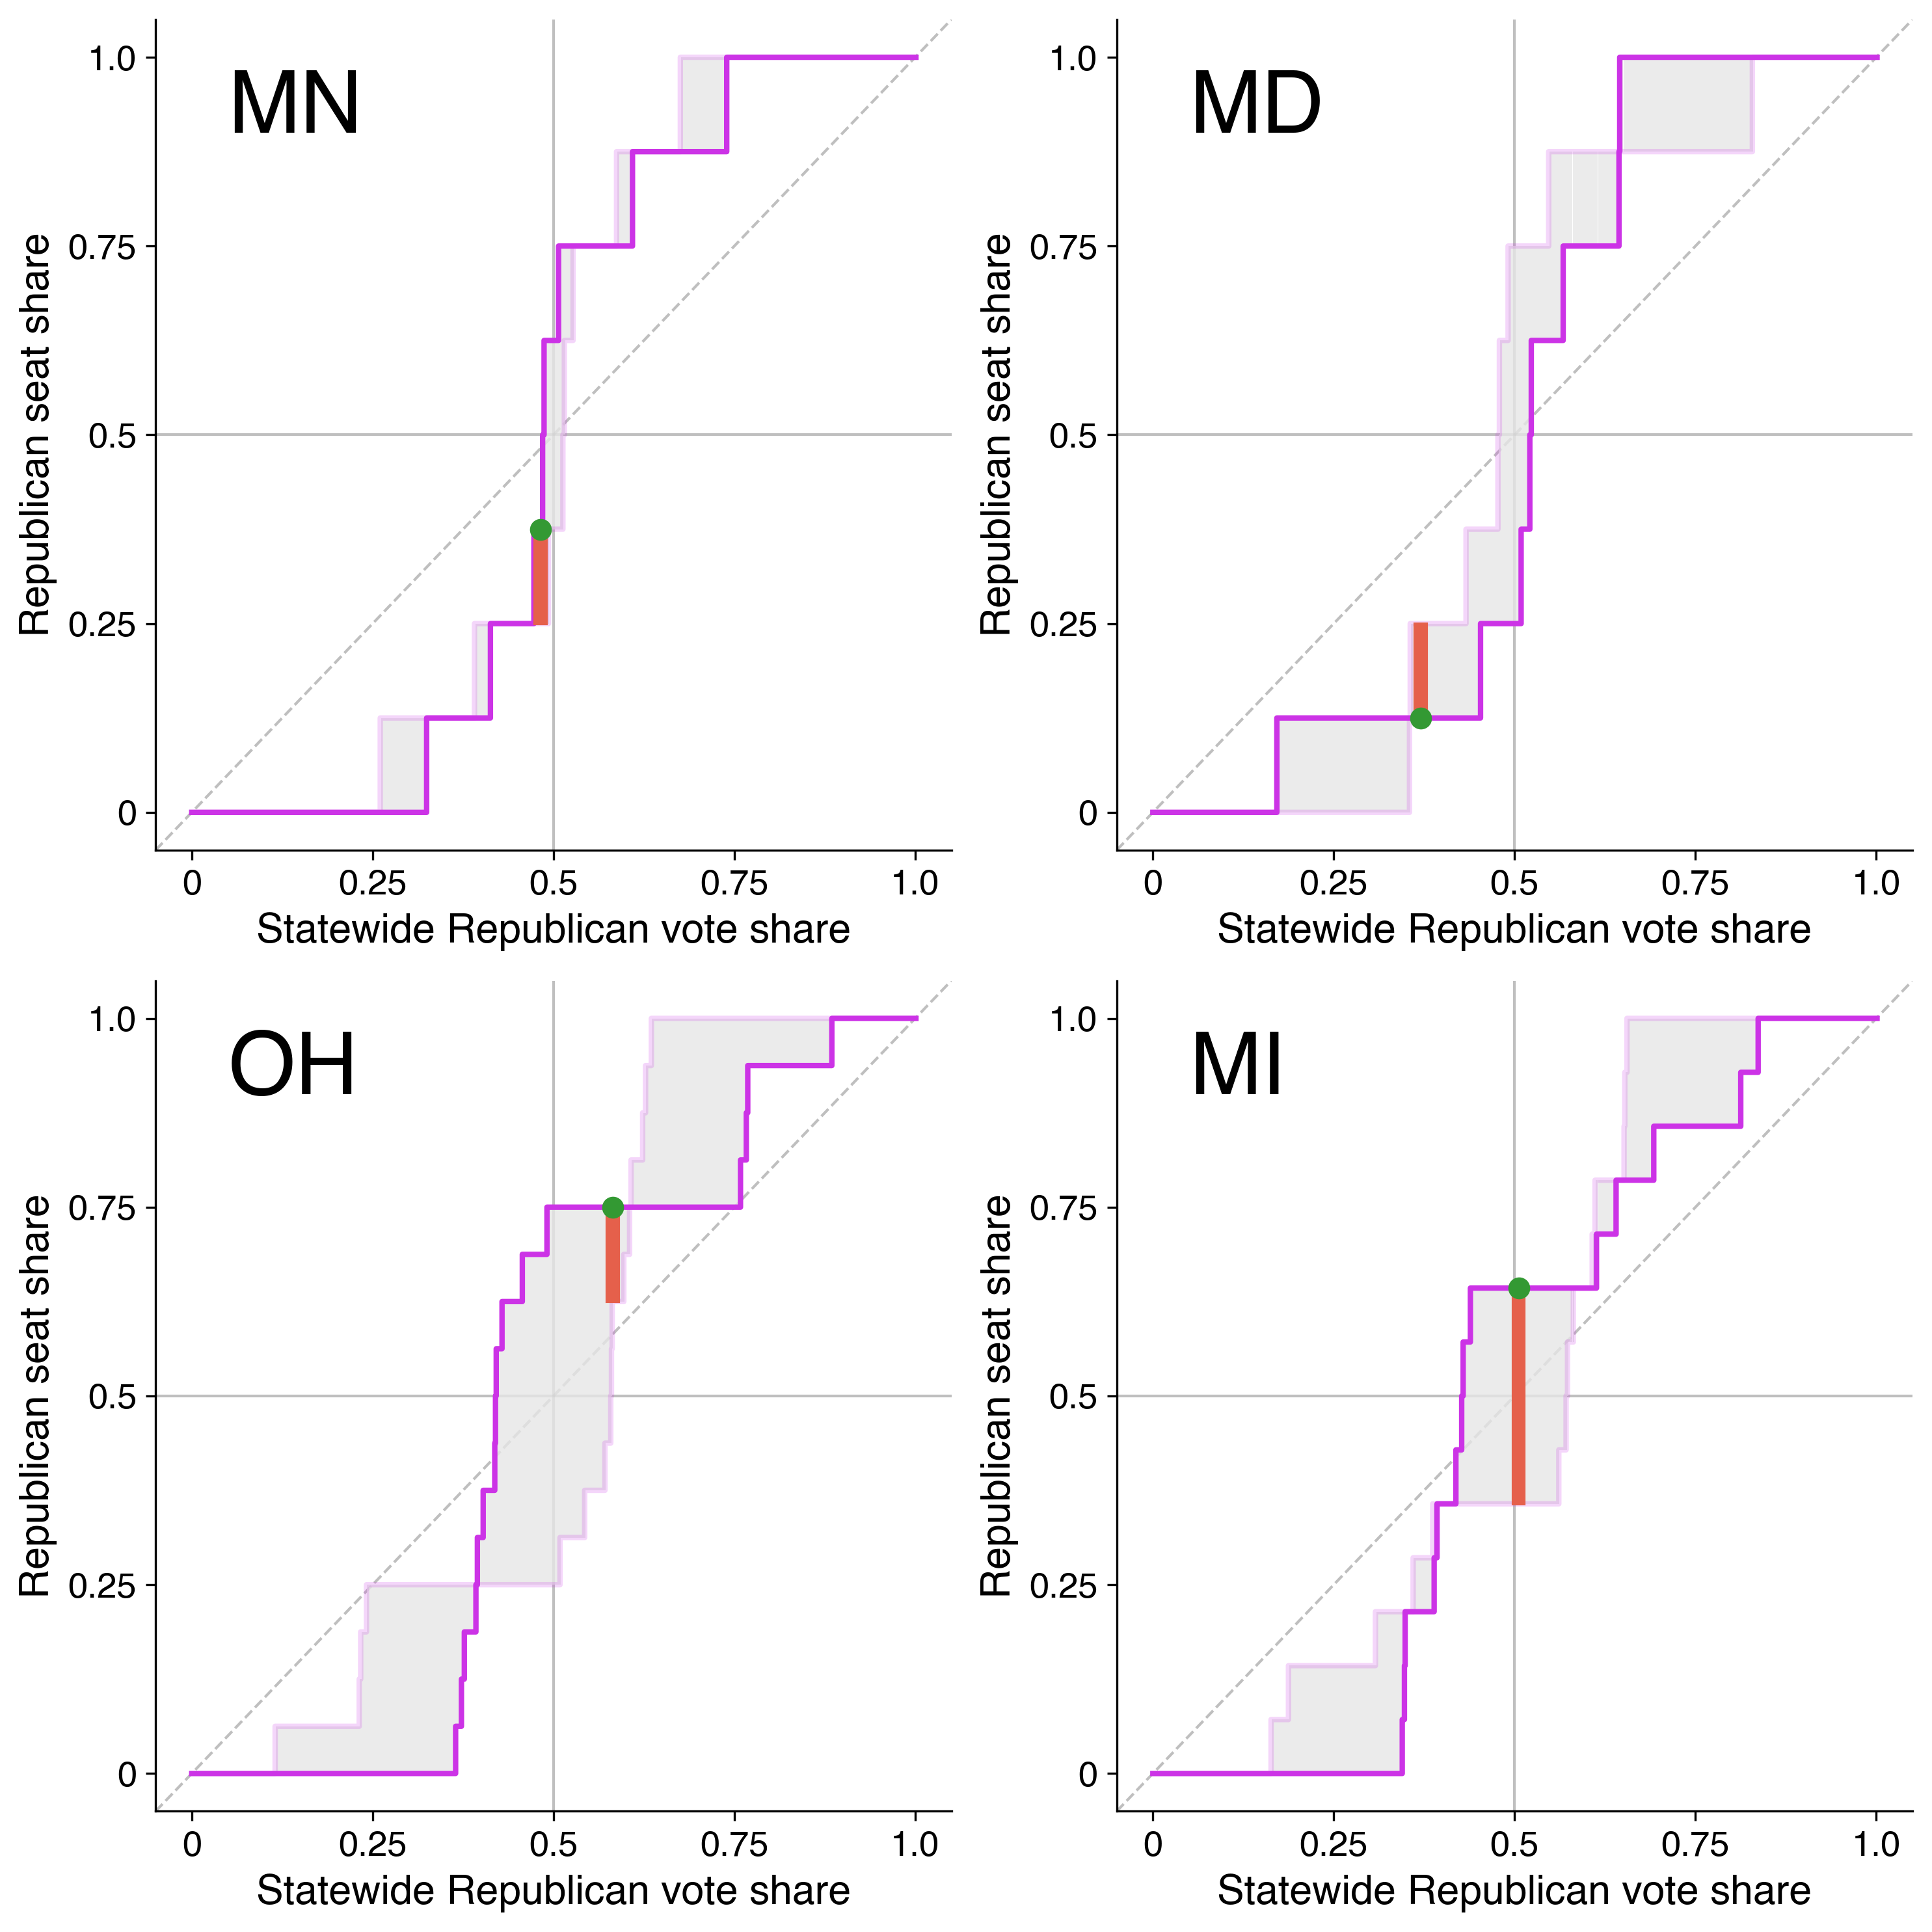

In [31]:
# Plot measures of partisan symmetry relating to the 180 degree rotation


plot_symmetric_point_and_shading_grid(states,
                                      actual_vote_share_list, 
                                      actual_seat_share_list, 
                                      vote_list, 
                                      seat_list,
                                      x_label=x_label)

plt.tight_layout()
plt.savefig("outputs/area_and_symmetry.png", dpi=500)


In [ ]:
# Plot all the measures of partisan symmetry

plot_all_measures_grid(states, 
                       actual_vote_share_list, 
                       actual_seat_share_list, 
                       vote_list, 
                       seat_list, 
                       x_label=x_label)

plt.tight_layout()
plt.savefig("outputs/all_measures.png", dpi=500)


In [ ]:
make_partisan_symmetry_table(states, 
                             actual_vote_share_list, 
                             actual_seat_share_list, 
                             vote_list, 
                             seat_list,
                             district_vote_shares,
                             latex=True)


In [ ]:
# Plot year by year election results in MN, showing partisan symmetry measures

state = "MN"
years = ["2012", "2014", "2016", "2018"]
actual_vote_share_list = []
actual_seat_share_list = []
vote_list = []
seat_list = []
district_vote_shares = []

for year in years:
    rep_votes_by_district, dem_votes_by_district = get_two_party_votes(state, int(year))
    rep_vote_shares_by_district, dem_vote_shares_by_district = votes_to_shares_by_district(rep_votes_by_district, dem_votes_by_district)
    average_district_vote_share, rep_seat_share = district_vote_shares_to_vote_and_seat_shares(rep_vote_shares_by_district)
    republican_statewide_vote_share, *_ = votes_to_overall_vote_share(rep_votes_by_district, dem_votes_by_district)   

    if want_statewide_vote_share:
        actual_vote_share_list.append(republican_statewide_vote_share)
        actual_seat_share_list.append(rep_seat_share)
        ups_votes, ups_seats = ups_linear_using_statewide_vote_share(rep_votes_by_district, dem_votes_by_district)
    else:
        actual_vote_share_list.append(average_district_vote_share)
        actual_seat_share_list.append(rep_seat_share)
        ups_votes, ups_seats = ups_linear(rep_vote_shares_by_district)
    vote_list.append(ups_votes)
    seat_list.append(ups_seats)
    district_vote_shares.append(rep_vote_shares_by_district)




plot_all_measures_grid(years,
                       actual_vote_share_list, 
                       actual_seat_share_list, 
                       vote_list, 
                       seat_list,
                       x_label=x_label)
plt.tight_layout()
plt.savefig("outputs/stability.png", dpi=500)

make_partisan_symmetry_table(years,actual_vote_share_list, actual_seat_share_list, vote_list, seat_list,district_vote_shares, latex=True)

In [ ]:
state = "MN"
year = 2016

rep_votes_by_district, dem_votes_by_district = get_two_party_votes(state, year)

make_wasted_votes_table_for_state(rep_votes_by_district, dem_votes_by_district, latex=True)

In [ ]:
make_competitiveness_table_for_state(rep_votes_by_district, dem_votes_by_district, latex=True)

In [ ]:
make_table_comparing_eg_expressions(['MD','MI','MN','MO','NC','NJ','OH','TN'],latex=True)

In [ ]:
# Plot efficiency gap diagram

plot_eg_band()
plt.tight_layout()
plt.savefig("outputs/efficiency_gap.png", dpi=500)



In [ ]:
# Making a figure introducing the concept of ensembles; data from Duke group

north_carolina_plans = [0, 1, 370, 9429, 36055, 19973, 709, 7, 0]
north_carolina_seats = [4, 5, 6, 7, 8, 9, 10, 11, 12]
fig = plt.figure()
ax = fig.add_subplot(111)
font_name = 'Helvetica'
font_size = 15

plt.bar(north_carolina_seats,north_carolina_plans)

x_label = "Seats for Republicans"
y_label = "Count"
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel(x_label, fontname=font_name, fontsize=font_size)
ax.set_ylabel(y_label, fontname=font_name, fontsize=font_size)

plt.savefig("outputs/NC2016_Rseats_histogram.png")
